# Adaptive Kalman Filter Implementation for Unchanging Velocity Model (CV) in Python

### Akhilesh S - AM.EN.U4AIE21108
### Rohit Shibu Thomas - AM.EN.U4AIE21154

### Importing the basic libraries

In [21]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm # norm provides functions to work with normal distributions

### Initial State

[[0.]
 [0.]
 [0.]
 [0.]] (4, 1)


Text(0.5, 1.0, 'Initial Location')

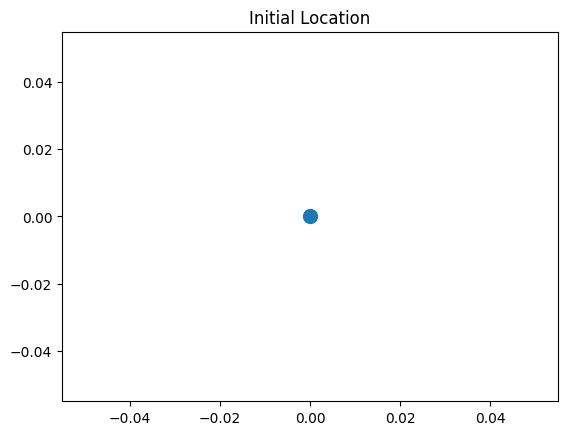

In [22]:
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T
print(x, x.shape)
plt.scatter(float(x[0]),float(x[1]), s=100)
plt.title('Initial Location')

### Initial Uncertainty

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] (4, 4)


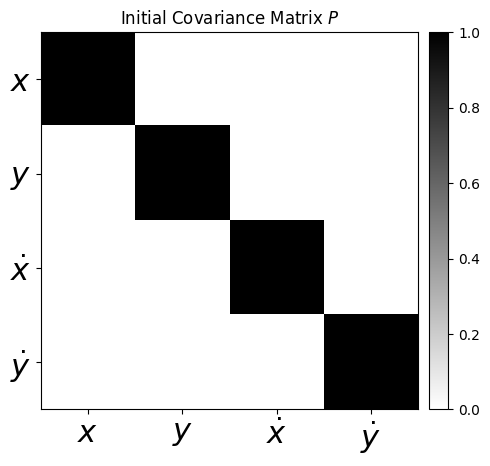

In [23]:
P = 1.0*np.eye(4)
print(P, P.shape)

fig = plt.figure(figsize=(5, 5))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Initial Covariance Matrix $P$')
ylocs, ylabels = plt.yticks() # to get the current locations and labels of the yticks
plt.yticks(np.arange(5))
# setting the locations and labels of the yticks
plt.yticks(np.arange(4),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

xlocs, xlabels = plt.xticks() # to get the current locations and labels of the xticks
plt.xticks(np.arange(5))
# setting the locations and labels of the yticks
plt.xticks(np.arange(4),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

plt.xlim([-0.5,3.5])
plt.ylim([3.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca()) # divider is created for the colorbar
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()

### Dynamic Matrix

In [24]:
dt = 0.1 # This is the Time Step between Filter Steps

A = np.matrix([[1.0, 0.0, dt, 0.0], # Creating a state transition matrix, defining how the state is changing from the previous to the current state
              [0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
print(A, A.shape)

[[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]] (4, 4)


### Measurement Matrix

We directly measure the Velocity $\dot x$ and $\dot y$

In [25]:
H = np.matrix([[0.0, 0.0, 1.0, 0.0], # Creating the observation matrix, which shows how that element of the state vector contributes to the corresponding measurement.
              [0.0, 0.0, 0.0, 1.0]])
print(H, H.shape)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]] (2, 4)


### Measurement Noise Covariance

This is just an initialization, R will be updated in each filter step of the adaptive Kalman Filter

[[1. 0.]
 [0. 1.]] (2, 2)


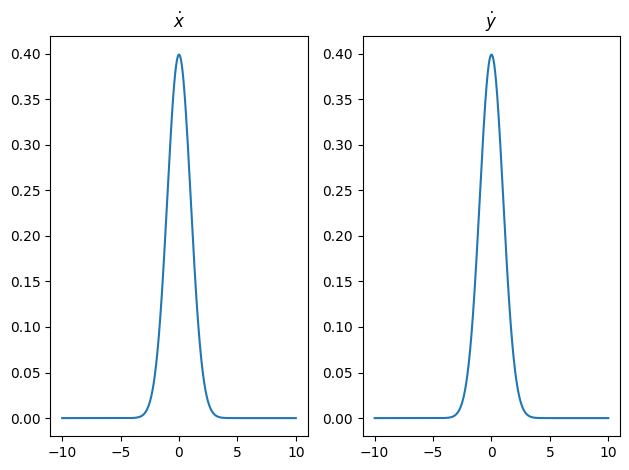

In [26]:
ra = 1.0**2 # calculating the variance of the measurement noise

R = np.matrix([[ra, 0.0],   # initializing the measurement covariance matrix
              [0.0, ra]])
print(R, R.shape)


# Plotting between -10 and 10 with .001 steps.
xpdf = np.arange(-10, 10, 0.001) # for plotting probability density functions

plt.subplot(121)
plt.plot(xpdf, norm.pdf(xpdf,0,R[0,0])) # plotting the probability density function for the variable correspoding to the first row and first column of the covariance matrix
plt.title('$\dot x$')

plt.subplot(122)
plt.plot(xpdf, norm.pdf(xpdf,0,R[1,1])) # plotting the probability density function for the variable correspoding to the second row and second column of the covariance matrix
plt.title('$\dot y$')
plt.tight_layout()

### Process Noise Covariance

In [27]:
sv = 1.0 # setting the process noise standard deviation to represent the uncertainty in the model

G = np.matrix([[0.5*dt**2], # Creating the process noise matrix, to define how the process noise affects the state transition matrix A
               [0.5*dt**2],
               [dt],
               [dt]])

Q = G*G.T*sv**2 # computing the process noise covariance matrix Q

In [28]:
from sympy import Symbol, Matrix
from sympy.interactive import printing # to print the matrix in a better way
printing.init_printing()
dts = Symbol('dt')
Qs = Matrix([[0.5*dts**2],[0.5*dts**2],[dts],[dts]]) # defining the process noise matrix symbolically
Qs*Qs.T

⎡       4         4        3        3⎤
⎢0.25⋅dt   0.25⋅dt   0.5⋅dt   0.5⋅dt ⎥
⎢                                    ⎥
⎢       4         4        3        3⎥
⎢0.25⋅dt   0.25⋅dt   0.5⋅dt   0.5⋅dt ⎥
⎢                                    ⎥
⎢      3         3       2        2  ⎥
⎢0.5⋅dt    0.5⋅dt      dt       dt   ⎥
⎢                                    ⎥
⎢      3         3       2        2  ⎥
⎣0.5⋅dt    0.5⋅dt      dt       dt   ⎦

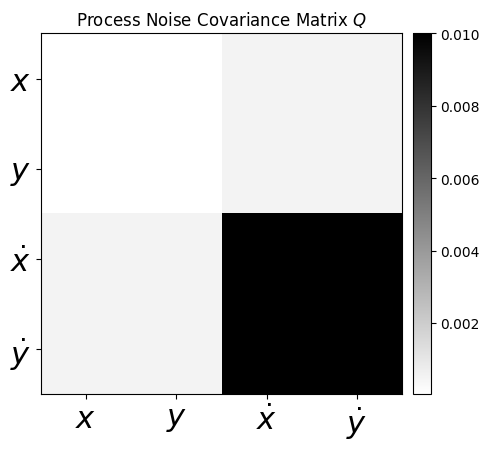

In [29]:
fig = plt.figure(figsize=(5, 5))
im = plt.imshow(Q, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Process Noise Covariance Matrix $Q$')
ylocs, ylabels = plt.yticks() # to get the current locations and labels of the yticks
plt.yticks(np.arange(5))
# setting the locations and labels of the yticks
plt.yticks(np.arange(4),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

xlocs, xlabels = plt.xticks() # to get the current locations and labels of the xticks
plt.xticks(np.arange(5))
# setting the locations and labels of the yticks
plt.xticks(np.arange(4),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

plt.xlim([-0.5,3.5]) 
plt.ylim([3.5, -0.5]) 

from mpl_toolkits.axes_grid1 import make_axes_locatable 
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%") # creating the colorbar
plt.colorbar(im, cax=cax)


plt.tight_layout()

### Identity Matrix

In [30]:
I = np.eye(4) # Creating the identity matrix
print(I, I.shape)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] (4, 4)


## Measurement

In [31]:
m = 200 # the number of measurements
vx= 20 # velocity in X
vy= 10 # velocity in Y

mx = np.array(vx+np.random.randn(m)) # adding some random noise to the measurements
my = np.array(vy+np.random.randn(m))

# finding some different error somewhere in the measurements
my[int(m/2):int(3*m/4)] = np.array(vy + 20.0 * np.random.randn(int(m/4)))

measurements = np.vstack((mx,my))

print(measurements.shape)

(2, 200)


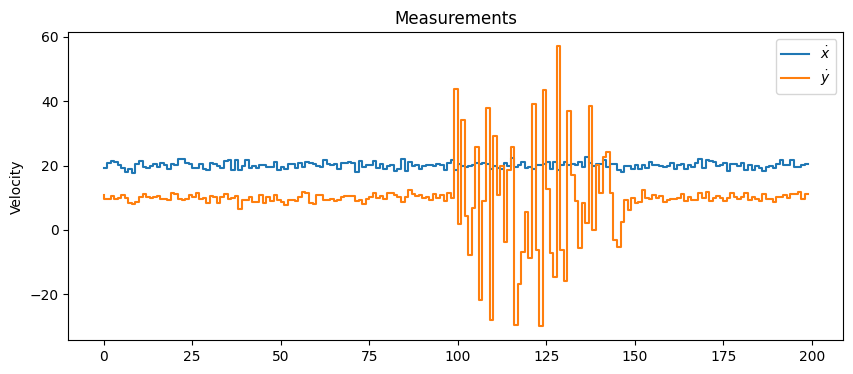

In [32]:
fig = plt.figure(figsize=(10,4))

plt.step(range(m),mx, label='$\dot x$') # plotting the x-velocity measurements
plt.step(range(m),my, label='$\dot y$')
plt.ylabel('Velocity')
plt.title('Measurements')
plt.legend(loc='best',prop={'size':10})

In [33]:
# Preallocating values for Plotting
xt = [] 
yt = []
dxt= [] 
dyt= []
Zx = [] 
Zy = []
Px = [] # covariance matrix
Py = []
Pdx= [] 
Pdy= []
Rdx= [] # measurement covariance matrix
Rdy= []
Kx = []  # Kalman Gains
Ky = []
Kdx= []
Kdy= []

# Kalman Filter

In [34]:
for n in range(len(measurements[0])):
    
    # Using the Adaptive Measurement Covariance R from last i Measurements as an Maximum Likelihood Estimation
    i = 10
    if n>i:
        R = np.matrix([[np.std(measurements[0,(n-i):n])**2, 0.0], # defining the measurement covariance matrix
                      [0.0, np.std(measurements[1,(n-i):n])**2]])
    
    # Predicting the time update
    # Projecting the state ahead using the state transition matrix
    x = A*x 
    
    # Projecting the error covariance ahead using the process noise covariance matrix
    P = A*P*A.T + Q 
    
    # Updating the measurement (Correction)
    # Computing the Kalman Gain
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)

    # Updating the estimate via z
    Z = measurements[:,n].reshape(2,1)
    y = Z - (H*x)
    x = x + (K*y)
    
    # Updating the error covariance
    P = (I - (K*H))*P

    # Saving states for Plotting
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pdx.append(float(P[2,2]))
    Pdy.append(float(P[3,3]))
    Rdx.append(float(R[0,0]))
    Rdy.append(float(R[1,1]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,0]))    

# Taking a look at the filter performance

### Kalman Gains K

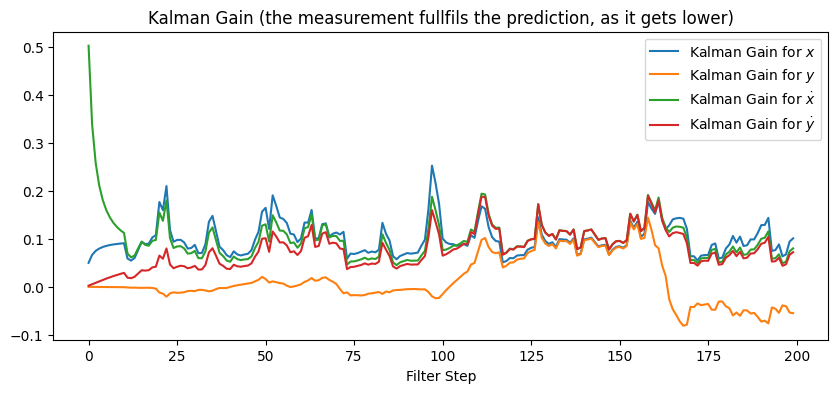

In [35]:
fig = plt.figure(figsize=(10,4))
plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
plt.plot(range(len(measurements[0])),Kdx, label='Kalman Gain for $\dot x$')
plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.title('Kalman Gain (the measurement fullfils the prediction, as it gets lower)')
plt.legend(loc='best',prop={'size':10})

### Covariance Matrix

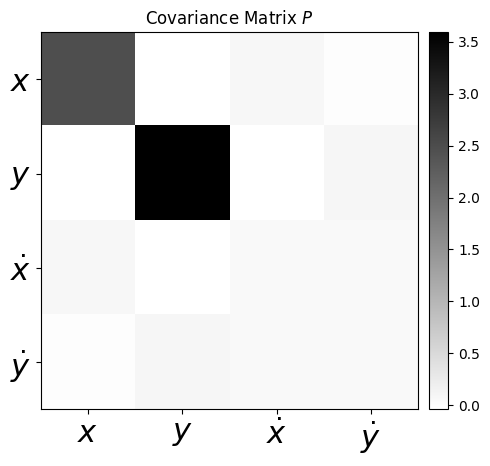

In [36]:
fig = plt.figure(figsize=(5, 5))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Covariance Matrix $P$')
ylocs, ylabels = plt.yticks() # setting the locations of the yticks
plt.yticks(np.arange(5)) # setting the locations and labels of the yticks
plt.yticks(np.arange(4),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

xlocs, xlabels = plt.xticks() # setting the locations of the yticks
plt.xticks(np.arange(5)) # setting the locations and labels of the yticks
plt.xticks(np.arange(4),('$x$', '$y$', '$\dot x$', '$\dot y$'), fontsize=22)

plt.xlim([-0.5,3.5])
plt.ylim([3.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca()) # creating the colorbar
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()

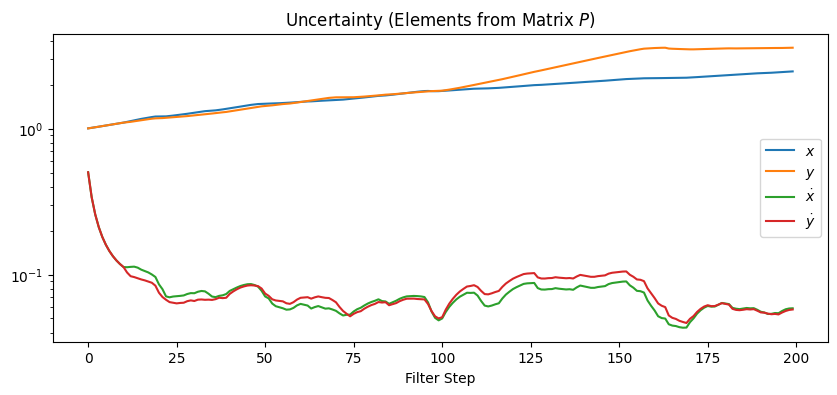

In [37]:
fig = plt.figure(figsize=(10,4))
plt.semilogy(range(len(measurements[0])),Px, label='$x$')
plt.semilogy(range(len(measurements[0])),Py, label='$y$')
plt.semilogy(range(len(measurements[0])),Pdx, label='$\dot x$')
plt.semilogy(range(len(measurements[0])),Pdy, label='$\dot y$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.title('Uncertainty (Elements from Matrix $P$)')
plt.legend(loc='best',prop={'size':10})

### State Estimate

Text(0, 0.5, 'Velocity')

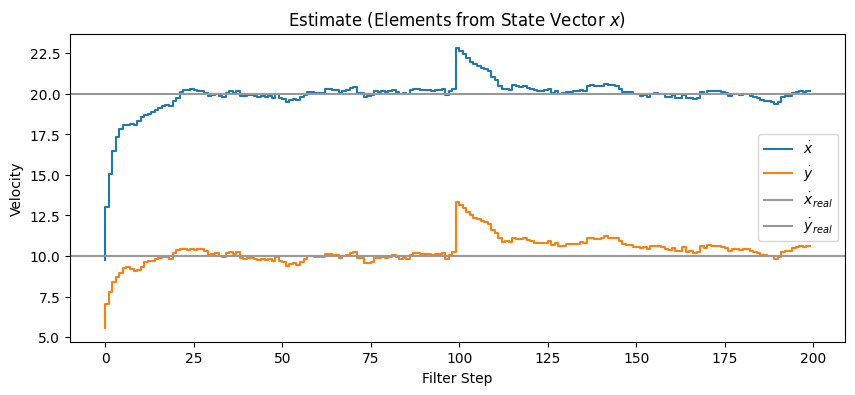

In [38]:
fig = plt.figure(figsize=(10,4))
plt.step(range(len(measurements[0])),dxt, label='$\dot x$') # plotting the x-velocity measurements
plt.step(range(len(measurements[0])),dyt, label='$\dot y$') # plotting the y-velocity measurements

plt.axhline(vx, color='#999999', label='$\dot x_{real}$') # plotting the real x-velocity
plt.axhline(vy, color='#999999', label='$\dot y_{real}$') # plotting the real y-velocity

plt.xlabel('Filter Step')
plt.title('Estimate (Elements from State Vector $x$)')
plt.legend(loc='best',prop={'size':10})
plt.ylabel('Velocity')

### Measurement Uncertainty R

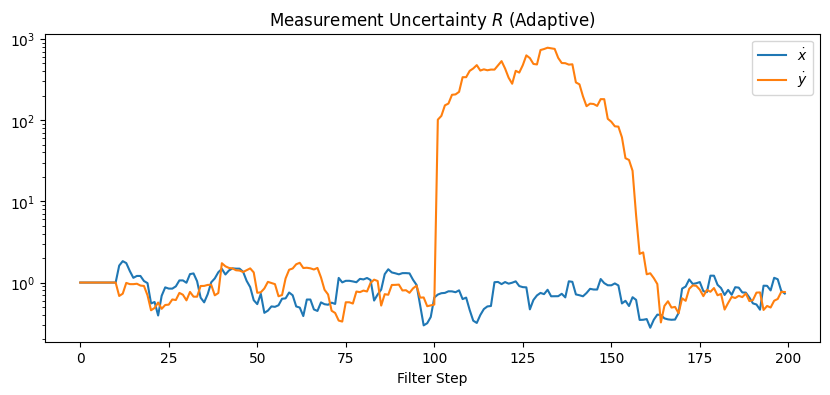

In [39]:
fig = plt.figure(figsize=(10,4))
plt.semilogy(range(len(measurements[0])),Rdx, label='$\dot x$')
plt.semilogy(range(len(measurements[0])),Rdy, label='$\dot y$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.title('Measurement Uncertainty $R$ (Adaptive)')
plt.legend(loc='best',prop={'size':10})

## Position x/y

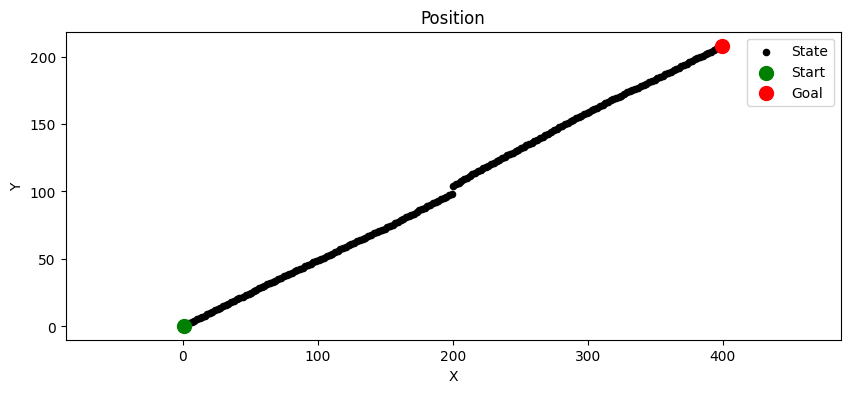

In [40]:
fig = plt.figure(figsize=(10,4)) # creating a scatter plot to provide a visual representation of the estimated positions of the system
plt.scatter(xt,yt, s=20, label='State', c='k')
plt.scatter(xt[0],yt[0], s=100, label='Start', c='g')
plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position')
plt.legend(loc='best')
plt.axis('equal')

# Conclusion

As we can see, between Filter Step 100 and 150, we have a massive noise in the measurement, but the adaptive filter is raising the measurement covariance (R), so that the Kalman Gain is trying to use the dynamic of the model instead of the noisey measurement.